##Import_Library

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score
from tabulate import tabulate

In [ ]:
pip install tabulate

##Load_Data

In [ ]:
# بارگذاری داده‌ها
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/sms.tsv"
data = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

# نمایش چند سطر از داده‌ها برای بررسی
print(data.head())

# نمایش اطلاعات کلی از داده‌ها
print(data.info())


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


##Program

In [ ]:
# فرض کنید data یک DataFrame است
data = pd.DataFrame({
    'label': ['spam', 'ham', np.nan, 'spam', 'ham'],
    'message': ['Free entry in 2 a wkly comp', 'Hey there!', 'NaN', 'Call now!', 'How are you?']
})

# بررسی وجود مقادیر NaN
nan_counts = data.isna().sum()

# حذف سطرهایی که برچسب یا پیام آنها NaN است
data.dropna(subset=['label', 'message'], inplace=True)

# بررسی تعداد داده‌ها پس از حذف NaN
num_samples_after_dropping = len(data)

# نمایش خروجی به صورت جدولی
output = pd.DataFrame({
    'Column': nan_counts.index,
    'NaN Count': nan_counts.values
})

# افزودن تعداد نمونه‌ها پس از حذف NaN به خروجی
num_samples_output = pd.DataFrame({
    'Description': ['Number of samples after removing NaN values'],
    'Value': [num_samples_after_dropping]
})

print(tabulate(output, headers='keys', tablefmt='pretty'))
print(tabulate(num_samples_output, headers='keys', tablefmt='pretty'))


+---+---------+-----------+
|   | Column  | NaN Count |
+---+---------+-----------+
| 0 |  label  |     1     |
| 1 | message |     0     |
+---+---------+-----------+
+---+---------------------------------------------+-------+
|   |                 Description                 | Value |
+---+---------------------------------------------+-------+
| 0 | Number of samples after removing NaN values |   4   |
+---+---------------------------------------------+-------+


35/35 [==============================] - 1s 18ms/step
+---+---------------+--------------------+--------------------+--------------------+
|   | Hidden Layers |      Accuracy      |       Recall       |      F1-Score      |
+---+---------------+--------------------+--------------------+--------------------+
| 0 |      0.0      | 0.9901345291479821 | 0.9395973154362416 | 0.9621993127147765 |
| 1 |      1.0      | 0.9901345291479821 | 0.9530201342281879 | 0.9627118644067796 |
| 2 |      2.0      | 0.9910313901345291 | 0.9530201342281879 | 0.9659863945578231 |
| 3 |      3.0      | 0.989237668161435  | 0.9463087248322147 | 0.9591836734693876 |
| 4 |      4.0      | 0.989237668161435  | 0.9395973154362416 | 0.958904109589041  |
| 5 |      5.0      | 0.9928251121076234 | 0.9731543624161074 | 0.9731543624161074 |
+---+---------------+--------------------+--------------------+--------------------+
+---+---------------------------------------------+--------------------------------+
|   |      

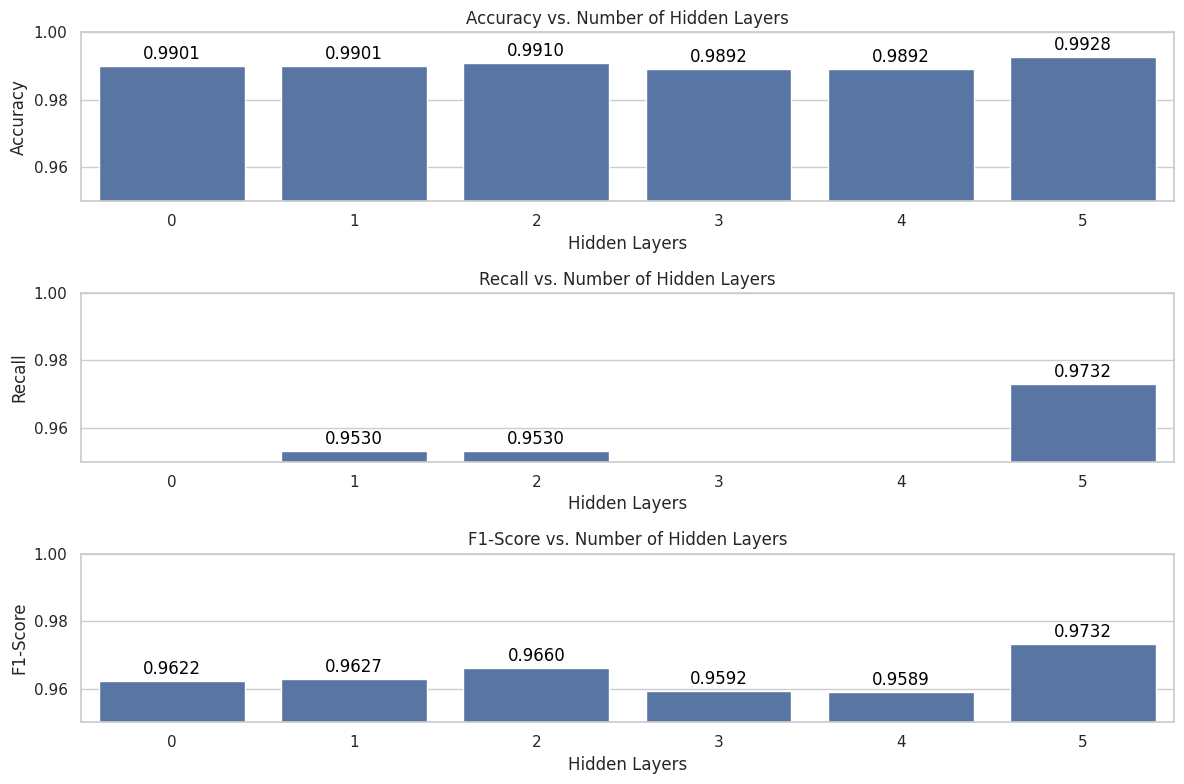

In [11]:
# بارگذاری داده‌ها
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/sms.tsv"
data = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

# تبدیل برچسب‌ها به اعداد (0 برای ham و 1 برای spam)
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# حذف سطرهایی که برچسب یا پیام آنها NaN است
data.dropna(subset=['label', 'message'], inplace=True)

# بررسی تعداد داده‌ها پس از حذف NaN
num_samples_after_dropping = len(data)

# تقسیم داده‌ها به ویژگی‌ها و برچسب‌ها
X = data['message'].values
y = data['label'].values

# تبدیل متن‌ها به توالی‌های اعداد
vocab_size = 10000
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)

# پدینگ کردن توالی‌ها به طول ثابت
maxlen = 100
X = pad_sequences(X, maxlen=maxlen)

# تقسیم داده‌ها به مجموعه آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# بررسی وجود NaN در y_test
if np.any(np.isnan(y_test)):
    nan_check = "NaN values found in y_test."
else:
    nan_check = "No NaN values found in y_test."

def create_model(hidden_layers, hidden_size, activation='relu'):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=maxlen))
    model.add(LSTM(64, return_sequences=False))  # return_sequences=False برای آخرین لایه LSTM
    for _ in range(hidden_layers):
        model.add(Dense(hidden_size, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# ارزیابی تاثیر تعداد لایه‌های مخفی
hidden_layers_options = [0, 1, 2, 3, 4, 5]
results = []

for hidden_layers in hidden_layers_options:
    model = create_model(hidden_layers, hidden_size=64)
    model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=0)
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append((hidden_layers, accuracy, recall, f1))

# نمایش نتایج
results_table = pd.DataFrame(results, columns=['Hidden Layers', 'Accuracy', 'Recall', 'F1-Score'])
print(tabulate(results_table, headers='keys', tablefmt='pretty'))

# نمایش تعداد داده‌ها پس از حذف NaN و بررسی NaN در y_test
info_table = pd.DataFrame({
    'Description': ['Number of samples after removing NaN values', 'NaN check in y_test'],
    'Value': [num_samples_after_dropping, nan_check]
})
print(tabulate(info_table, headers='keys', tablefmt='pretty'))

# رسم نمودار
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# رسم نمودار Accuracy
plt.subplot(3, 1, 1)
ax1 = sns.barplot(x='Hidden Layers', y='Accuracy', data=results_table)
ax1.set_title('Accuracy vs. Number of Hidden Layers')
ax1.set_ylim(0.95, 1.0)
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# رسم نمودار Recall
plt.subplot(3, 1, 2)
ax2 = sns.barplot(x='Hidden Layers', y='Recall', data=results_table)
ax2.set_title('Recall vs. Number of Hidden Layers')
ax2.set_ylim(0.95, 1.0)
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# رسم نمودار F1-Score
plt.subplot(3, 1, 3)
ax3 = sns.barplot(x='Hidden Layers', y='F1-Score', data=results_table)
ax3.set_title('F1-Score vs. Number of Hidden Layers')
ax3.set_ylim(0.95, 1.0)
for p in ax3.patches:
    ax3.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()


35/35 [==============================] - 1s 18ms/step
+---+------------+--------------------+--------------------+--------------------+
|   | Vocab Size |      Accuracy      |       Recall       |      F1-Score      |
+---+------------+--------------------+--------------------+--------------------+
| 0 |   8000.0   | 0.9919282511210762 | 0.959731543624161  | 0.9694915254237289 |
| 1 |   5000.0   | 0.9910313901345291 | 0.9530201342281879 | 0.9659863945578231 |
| 2 |   2000.0   | 0.9874439461883409 | 0.9194630872483222 | 0.9513888888888888 |
+---+------------+--------------------+--------------------+--------------------+


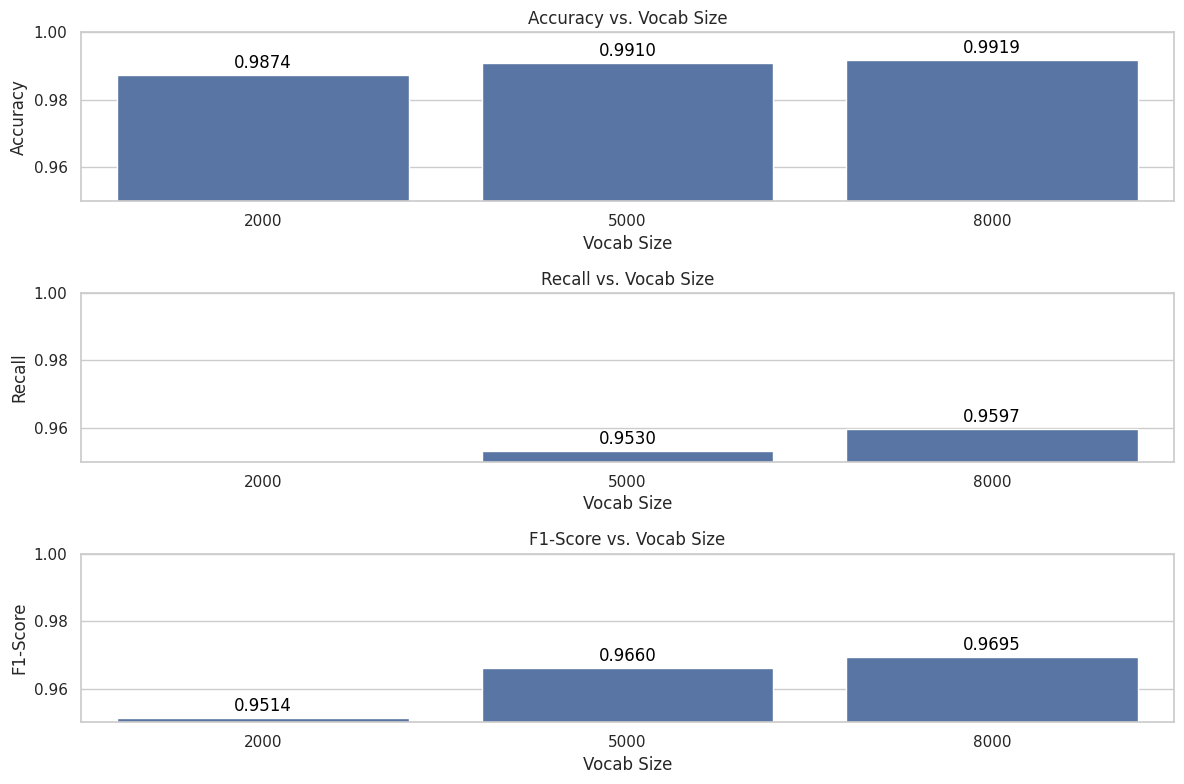

+---+---------------------------------------------+-------+
|   |                 Description                 | Value |
+---+---------------------------------------------+-------+
| 0 | Number of samples after removing NaN values | 5572  |
+---+---------------------------------------------+-------+


In [12]:
# بارگذاری داده‌ها
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/sms.tsv"
data = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

# تبدیل برچسب‌ها به اعداد (0 برای ham و 1 برای spam)
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# حذف سطرهایی که برچسب یا پیام آنها NaN است
data.dropna(subset=['label', 'message'], inplace=True)

# بررسی تعداد داده‌ها پس از حذف NaN
num_samples_after_dropping = len(data)

# تقسیم داده‌ها به ویژگی‌ها و برچسب‌ها
X = data['message'].values
y = data['label'].values

# تبدیل متن‌ها به توالی‌های اعداد
vocab_sizes = [8000, 5000, 2000]
results = []

for vocab_size in vocab_sizes:
    tokenizer = Tokenizer(num_words=vocab_size)
    tokenizer.fit_on_texts(X)
    X_seq = tokenizer.texts_to_sequences(X)

    # پدینگ کردن توالی‌ها به طول ثابت
    maxlen = 100
    X_pad = pad_sequences(X_seq, maxlen=maxlen)

    # تقسیم داده‌ها به مجموعه آموزش و تست
    X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

    def create_model(hidden_layers, hidden_size, activation='relu'):
        model = Sequential()
        model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=maxlen))
        model.add(LSTM(64, return_sequences=False))  # return_sequences=False برای آخرین لایه LSTM
        for _ in range(hidden_layers):
            model.add(Dense(hidden_size, activation=activation))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

    # ارزیابی تاثیر تعداد لایه‌های مخفی
    hidden_layers = 2  # ثابت نگه داشتن تعداد لایه‌های مخفی
    hidden_size = 64  # ثابت نگه داشتن اندازه لایه‌های مخفی
    model = create_model(hidden_layers, hidden_size)
    model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=0)
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append((vocab_size, accuracy, recall, f1))

# نمایش نتایج
results_table = pd.DataFrame(results, columns=['Vocab Size', 'Accuracy', 'Recall', 'F1-Score'])
print(tabulate(results_table, headers='keys', tablefmt='pretty'))

# رسم نمودار
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# رسم نمودار Accuracy
plt.subplot(3, 1, 1)
ax1 = sns.barplot(x='Vocab Size', y='Accuracy', data=results_table)
ax1.set_title('Accuracy vs. Vocab Size')
ax1.set_ylim(0.95, 1.0)
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# رسم نمودار Recall
plt.subplot(3, 1, 2)
ax2 = sns.barplot(x='Vocab Size', y='Recall', data=results_table)
ax2.set_title('Recall vs. Vocab Size')
ax2.set_ylim(0.95, 1.0)
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# رسم نمودار F1-Score
plt.subplot(3, 1, 3)
ax3 = sns.barplot(x='Vocab Size', y='F1-Score', data=results_table)
ax3.set_title('F1-Score vs. Vocab Size')
ax3.set_ylim(0.95, 1.0)
for p in ax3.patches:
    ax3.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

# نمایش تعداد داده‌ها پس از حذف NaN
info_table = pd.DataFrame({
    'Description': ['Number of samples after removing NaN values'],
    'Value': [num_samples_after_dropping]
})
print(tabulate(info_table, headers='keys', tablefmt='pretty'))


35/35 [==============================] - 1s 18ms/step
+---+---------------------+--------------------+--------------------+--------------------+
|   | Activation Function |      Accuracy      |       Recall       |      F1-Score      |
+---+---------------------+--------------------+--------------------+--------------------+
| 0 |        relu         | 0.9910313901345291 | 0.959731543624161  | 0.9662162162162162 |
| 1 |       sigmoid       | 0.9910313901345291 | 0.959731543624161  | 0.9662162162162162 |
| 2 |       linear        | 0.9901345291479821 | 0.9530201342281879 | 0.9627118644067796 |
+---+---------------------+--------------------+--------------------+--------------------+


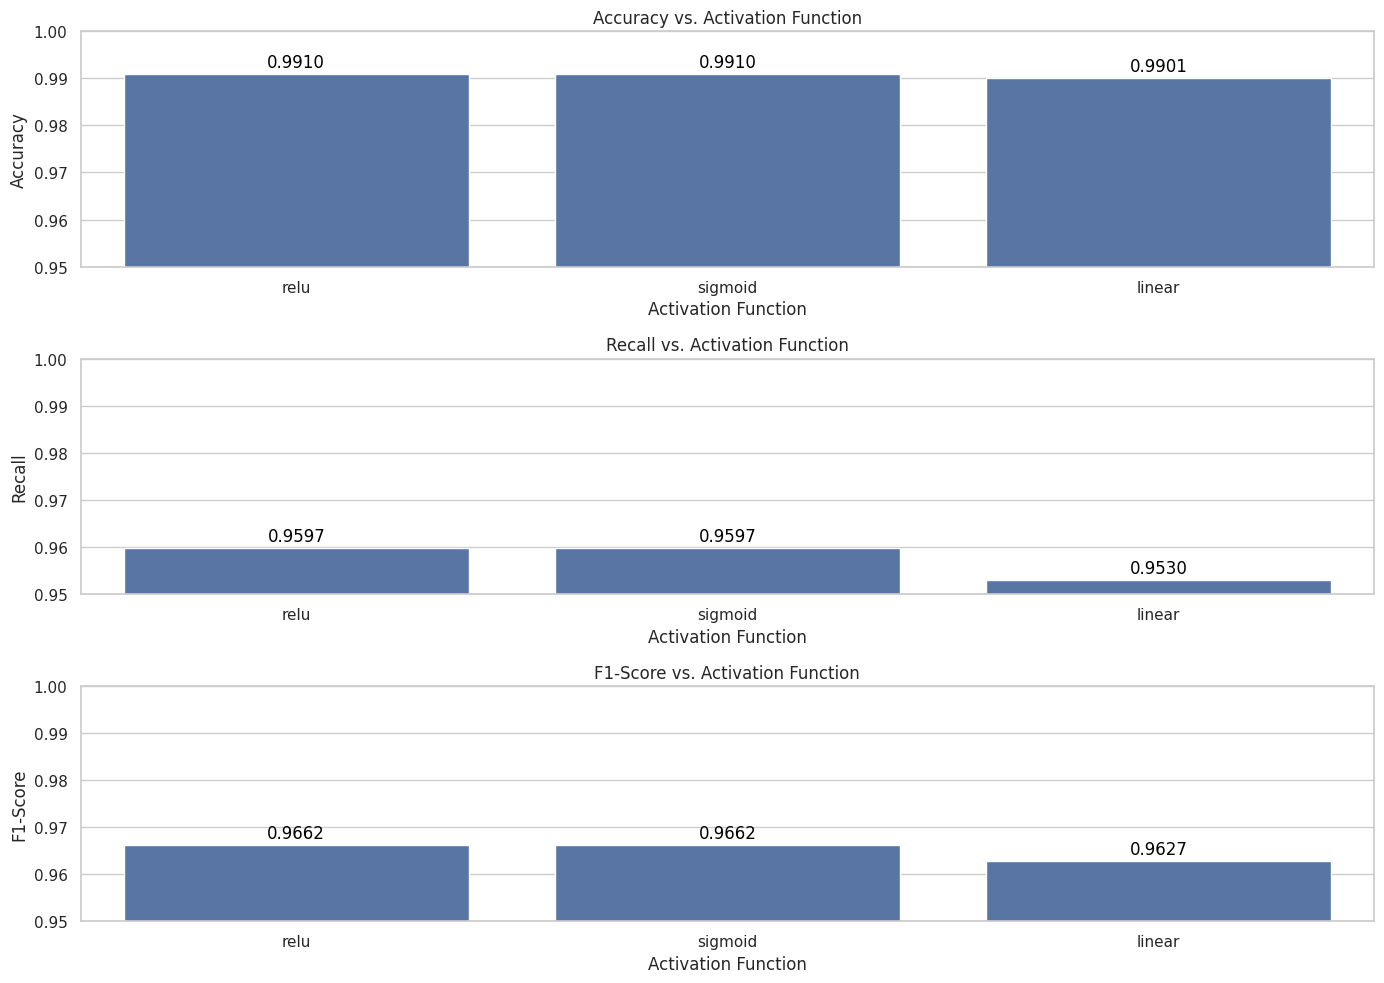

+---+---------------------------------------------+-------+
|   |                 Description                 | Value |
+---+---------------------------------------------+-------+
| 0 | Number of samples after removing NaN values | 5572  |
+---+---------------------------------------------+-------+


In [13]:
# بارگذاری داده‌ها
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/sms.tsv"
data = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

# تبدیل برچسب‌ها به اعداد (0 برای ham و 1 برای spam)
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# حذف سطرهایی که برچسب یا پیام آنها NaN است
data.dropna(subset=['label', 'message'], inplace=True)

# بررسی تعداد داده‌ها پس از حذف NaN
num_samples_after_dropping = len(data)

# تقسیم داده‌ها به ویژگی‌ها و برچسب‌ها
X = data['message'].values
y = data['label'].values

# تبدیل متن‌ها به توالی‌های اعداد
vocab_size = 10000
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

# پدینگ کردن توالی‌ها به طول ثابت
maxlen = 100
X_pad = pad_sequences(X_seq, maxlen=maxlen)

# تقسیم داده‌ها به مجموعه آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

def create_model(hidden_layers, hidden_size, activation='relu'):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=maxlen))
    model.add(LSTM(64, return_sequences=False))  # return_sequences=False برای آخرین لایه LSTM
    for _ in range(hidden_layers):
        model.add(Dense(hidden_size, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# ارزیابی تاثیر توابع فعال‌سازی مختلف
activation_functions = ['relu', 'sigmoid', 'linear']
results = []

for activation in activation_functions:
    hidden_layers = 2  # ثابت نگه داشتن تعداد لایه‌های مخفی
    hidden_size = 64  # ثابت نگه داشتن اندازه لایه‌های مخفی
    model = create_model(hidden_layers, hidden_size, activation=activation)
    model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=0)
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append((activation, accuracy, recall, f1))

# نمایش نتایج
results_table = pd.DataFrame(results, columns=['Activation Function', 'Accuracy', 'Recall', 'F1-Score'])
print(tabulate(results_table, headers='keys', tablefmt='pretty'))

# رسم نمودارها
sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))

# رسم نمودار Accuracy
plt.subplot(3, 1, 1)
ax1 = sns.barplot(x='Activation Function', y='Accuracy', data=results_table)
ax1.set_title('Accuracy vs. Activation Function')
ax1.set_ylim(0.95, 1.0)
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# رسم نمودار Recall
plt.subplot(3, 1, 2)
ax2 = sns.barplot(x='Activation Function', y='Recall', data=results_table)
ax2.set_title('Recall vs. Activation Function')
ax2.set_ylim(0.95, 1.0)
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# رسم نمودار F1-Score
plt.subplot(3, 1, 3)
ax3 = sns.barplot(x='Activation Function', y='F1-Score', data=results_table)
ax3.set_title('F1-Score vs. Activation Function')
ax3.set_ylim(0.95, 1.0)
for p in ax3.patches:
    ax3.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

# نمایش تعداد داده‌ها پس از حذف NaN
info_table = pd.DataFrame({
    'Description': ['Number of samples after removing NaN values'],
    'Value': [num_samples_after_dropping]
})
print(tabulate(info_table, headers='keys', tablefmt='pretty'))
